In [1]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from activ.pipeline import score_clusters
import matplotlib.pyplot as plt
import scipy
import h5py
from scipy.stats import entropy
from scipy.spatial.distance import pdist, squareform
import scipy.cluster.hierarchy as _sch
from collections import Counter
from activ import load_data
import pandas as pd
from math import ceil
import pandas as pd
from matplotlib import cm

In [2]:
fulldata = pd.read_csv('/Users/ahyeon/Desktop/TBIanalysis/data/preprocessed_data_matrix.csv', encoding = "ISO-8859-1")
fulldata = fulldata.fillna(-1)
fulldata.shape

(586, 919)

In [3]:
data = load_data()
nmfdata = load_data(uoinmf=True)
oc_features = data.outcome_features
oc_bases = nmfdata.outcome_bases
oc = data.outcomes
oc.shape

(247, 177)

In [4]:
file = '/Users/ahyeon/Desktop/activ misc/sweep_u2-10_c2-50_i50_raw-oc-cluster_uoinmf-bm-predict/umap_clustering_sweep.h5'

In [5]:
f = h5py.File(file, 'r')

In [6]:
umap_dims = f['umap_dimensions'][:]
score = f['score'][:]
norm_score = f['norm_score'][:]
clusters = f['clusters'][:]
cluster_sizes = f['cluster_sizes'][:]
emb = f['umap_embeddings'][:]
scale = f['umap_embeddings_dimscale'][:][:54]

In [7]:
for dim in umap_dims:
    all_dmat = np.zeros((30381,50))
    for x in range(emb.shape[0]):
        dmat = pdist(emb[x][:,scale==dim], metric='mahalanobis')
        all_dmat[:,x] = dmat
    mean = all_dmat.mean(axis=1)
mean.shape

(30381,)

In [8]:
def calc_entropy(gose_scores):
    probs = np.array(list(Counter(gose_scores).values()))/len(gose_scores)
    return entropy(probs, base=2.0)

In [9]:
def entropy_across_clusters(cluster_sizes, data):
    values = []
    tree = _sch.linkage(mean, method='ward')
    labels = _sch.cut_tree(tree, cluster_sizes)
    for ii,c in enumerate(cluster_sizes):
        entropies = []
        for label in np.unique(labels[:,ii]):
            scores = data[labels[:,ii]==label]
            ent = calc_entropy(scores)
            entropies.append(ent)
        v = np.mean(entropies)
        values.append(v)
    return values

In [10]:
# leverage scores
leveragescores = pd.read_csv('/Users/ahyeon/Desktop/activ misc/fullfeaturestable.csv', encoding = "ISO-8859-1")
scores = leveragescores['Leverage Score']
leveragescores
features = leveragescores['0%']

In [11]:
len(features)

177

In [18]:
print(features[:10][::-1])

9     NeuroCognitiveDiffRemembering6mo
8              NeuroPhysVisualProbl6mo
7             CHARTSFPhysicalTotal_6mo
6                   GOSE_OtherIssues3M
5             NeuroEmotionalSadness6mo
4        GOSE_Reponder6M_Patient.alone
3            NeuroSleepSleepingLess6mo
2        NeuroEmotionalIrritability6mo
1    NeuroSleepTroubleFallingAsleep6mo
0                   GOSE_OtherIssues6M
Name: 0%, dtype: object


In [71]:
oc.shape

(247, 177)

0 NeuroCognitiveDiffRemembering6mo
1 NeuroPhysVisualProbl6mo
2 CHARTSFPhysicalTotal_6mo
3 GOSE_OtherIssues3M
4 NeuroEmotionalSadness6mo
5 GOSE_Reponder6M_Patient.alone
6 NeuroSleepSleepingLess6mo
7 NeuroEmotionalIrritability6mo
8 NeuroSleepTroubleFallingAsleep6mo
9 GOSE_OtherIssues6M


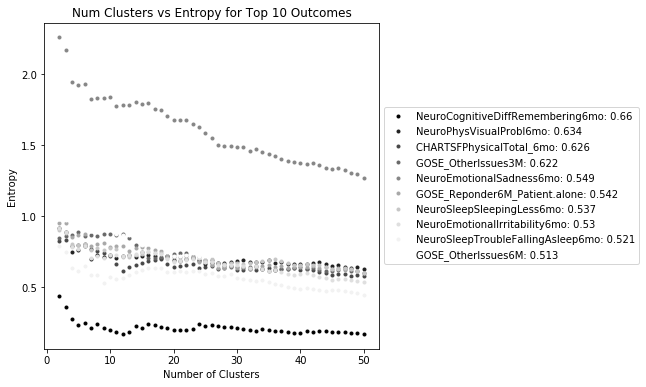

In [56]:
# top 10
plt.figure(figsize=(6,6))
colormap = cm.Greys_r
colors = [colormap(i) for i in np.linspace(0, 1, 10)]
for ii,i in enumerate(features[:10]):
    print(ii,i)
    data = oc[:,ii]
    score = float(round(scores[ii],3))
    plt.plot(cluster_sizes, entropy_across_clusters(cluster_sizes, data), '.', label=i+ ': ' + str(score), color=colors[ii])
    plt.legend(loc="center left", bbox_to_anchor=(1,0.5))
    plt.xlabel('Number of Clusters')
    plt.ylabel('Entropy')
    plt.title('Num Clusters vs Entropy for Top 10 Outcomes')
plt.savefig('/Users/ahyeon/Desktop/activ misc/top10_entropy.pdf',bbox_inches='tight')

In [57]:
plt.figure(figsize=(6,6))
colormap = cm.Greys_r
colors = [colormap(i) for i in np.linspace(0, 1, 10)]
new_data = []
for ii,i in enumerate(features[:10]):
    data = oc[:,ii]
    new_data.append(data)

# plt.savefig('/Users/ahyeon/Desktop/activ misc/top10_entropy.pdf',bbox_inches='tight')

<Figure size 432x432 with 0 Axes>

In [58]:
new_data[0]

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  2.,  1.,  1.,  1.,  1.,  1.,  1.,  2.,  1.,  1.,  1.,
        1.,  1.,  1.,  2.,  1.,  1.,  2.,  1.,  2.,  2.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  2.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  2.,  1.,  2.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  2.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1

In [59]:
new_data2 = new_data[::-1]

In [60]:
new_data2[0]

array([ 0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,
        0.,  0.,  1.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  1.,  1.,  0.,
        1.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,
        0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,
        0.,  0.,  0.,  1.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,  0.,  0.,
        1.,  1.,  1.,  1.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,
        1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
        0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,
        1.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,
        0.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,
        1.,  1.,  1.,  0.,  0.,  1.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,
        1.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,
        1.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  1

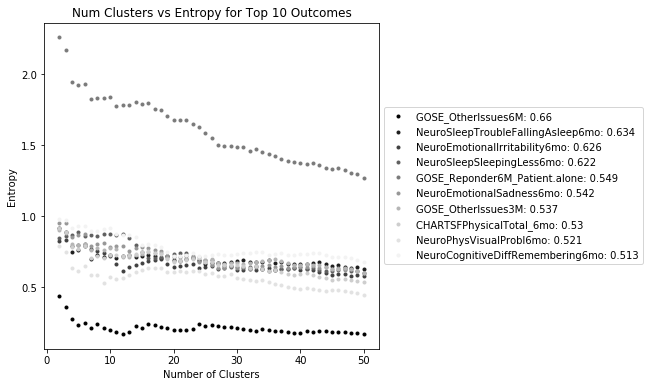

In [70]:
# top 10
plt.figure(figsize=(6,6))
colormap = cm.Greys_r
colors = [colormap(i) for i in np.linspace(0, 0.9, 10)]
for ii,i in enumerate(features[:10]):
    data = oc[:,ii]
    score = float(round(scores[ii],3))
    plt.plot(cluster_sizes, entropy_across_clusters(cluster_sizes, data), '.', label=i+ ': ' + str(score), color=colors[ii])
    plt.legend(loc="center left", bbox_to_anchor=(1,0.5))
    plt.xlabel('Number of Clusters')
    plt.ylabel('Entropy')
    plt.title('Num Clusters vs Entropy for Top 10 Outcomes')
plt.savefig('/Users/ahyeon/Desktop/activ misc/top10_entropy.pdf',bbox_inches='tight')

In [19]:
ents = []
for ii,i in enumerate(features):
    data = oc[:,ii]
    score = float(round(scores[ii],3))
    ent = entropy_across_clusters(cluster_sizes, data)
    norm_es = []
    for e in ent:
        norm_e = e/6.4528978693566312
        norm_es.append(norm_e)
    ents.append(norm_es)


[[0.067263695497741277,
  0.055458504912885009,
  0.042203319294085238,
  0.035488945270748612,
  0.038224805487363525,
  0.032764118989168735,
  0.036581157941871625,
  0.032516584837219219,
  0.030644354141831774,
  0.028289549100996143,
  0.026437838292953934,
  0.0287691833943385,
  0.035117847864151647,
  0.032891181426072676,
  0.036692097613935791,
  0.036097316832392812,
  0.034091910341704328,
  0.032692977471091934,
  0.031058328597537342,
  0.030320792892136128,
  0.030028542366056777,
  0.031798319799958591,
  0.036781410914702863,
  0.035310154478114752,
  0.036042341605719737,
  0.034707440064767156,
  0.033467888633882614,
  0.033665434918855555,
  0.032543253754893697,
  0.031493471375703581,
  0.030509300395212845,
  0.029584776140812456,
  0.031429051673269939,
  0.030681364558898805,
  0.029829104432262728,
  0.029022912420579951,
  0.028259151567406795,
  0.027534557937473288,
  0.026846193989036454,
  0.02925782508830134,
  0.028561210205246549,
  0.030009561027542

In [22]:
len(ents)

177

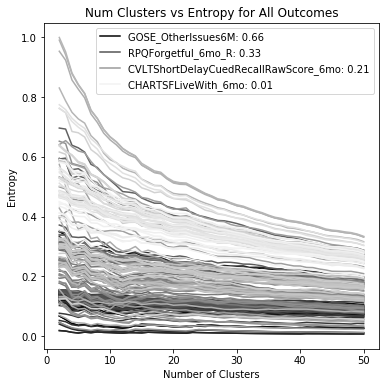

In [24]:
# all features normed

plt.figure(figsize=(6,6))
colormap = cm.Greys_r
colors = [colormap(i) for i in np.linspace(0, 0.9, 177)]
include = [0,50,100,176,177]
for ii,i in enumerate(features):
    data = oc[:,ii]
    score = float(round(scores[ii],3))
    plt.gray()
    plt.plot(cluster_sizes, ents[ii], color=colors[ii])
    plt.xlabel('Number of Clusters')
    plt.ylabel('Entropy')
    plt.title('Num Clusters vs Entropy for All Outcomes')
    if ii in include:
        plt.plot(cluster_sizes, ents[ii], color=colors[ii], label=i+ ': ' + str(score))
        plt.legend()
plt.savefig('/Users/ahyeon/Desktop/activ misc/all_entropy_norm.pdf',bbox_inches='tight')

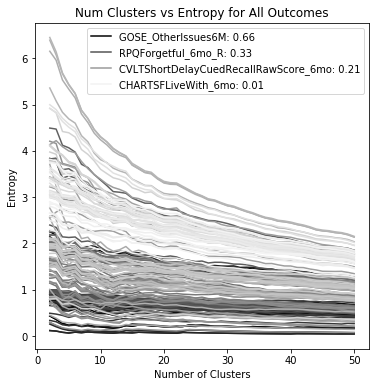

In [22]:
# all features

plt.figure(figsize=(6,6))
colormap = cm.Greys_r
colors = [colormap(i) for i in np.linspace(0, 0.9, 177)]
include = [0,50,100,176,177]
for ii,i in enumerate(features):
    data = oc[:,ii]
    score = float(round(scores[ii],3))
    plt.gray()
    plt.plot(cluster_sizes, entropy_across_clusters(cluster_sizes, data), color=colors[ii])
    plt.xlabel('Number of Clusters')
    plt.ylabel('Entropy')
    plt.title('Num Clusters vs Entropy for All Outcomes')
    if ii in include:
        plt.plot(cluster_sizes, entropy_across_clusters(cluster_sizes, data), color=colors[ii], label=i+ ': ' + str(score))
        plt.legend()
plt.savefig('/Users/ahyeon/Desktop/activ misc/all_entropy.pdf',bbox_inches='tight')